Set is a collection of unique elements. It is unordered.

## Why do we use set?

Let's say we have an array of numbers and we want to find the unique elements in the array. How do we do it?

In [6]:
# random numbers from 1 to 100, some are repeated
import random

numbers = [random.randint(1, 100) for i in range(200)]
print(numbers)

[92, 76, 79, 55, 54, 14, 24, 37, 73, 83, 99, 76, 79, 83, 41, 95, 30, 70, 10, 72, 23, 24, 76, 39, 71, 79, 37, 5, 96, 19, 4, 90, 78, 12, 58, 59, 94, 19, 65, 61, 49, 34, 87, 71, 82, 24, 13, 90, 89, 4, 24, 15, 94, 58, 64, 17, 51, 65, 74, 43, 71, 64, 14, 24, 88, 15, 34, 75, 77, 26, 99, 38, 12, 42, 97, 79, 44, 49, 85, 24, 67, 6, 36, 25, 77, 72, 23, 85, 3, 10, 35, 82, 55, 5, 72, 81, 16, 84, 91, 32, 55, 74, 89, 76, 43, 4, 34, 12, 50, 40, 31, 81, 81, 97, 88, 85, 82, 17, 74, 59, 90, 86, 57, 84, 77, 11, 24, 17, 30, 57, 39, 96, 37, 75, 22, 66, 90, 33, 67, 6, 70, 31, 92, 2, 38, 36, 42, 50, 59, 26, 97, 77, 59, 36, 25, 64, 79, 90, 20, 37, 75, 40, 72, 28, 27, 37, 46, 51, 67, 21, 16, 24, 75, 1, 33, 37, 4, 42, 45, 63, 99, 57, 16, 41, 60, 18, 99, 31, 98, 88, 88, 25, 47, 66, 12, 49, 27, 69, 81, 51]


## Simplest way

There are many ways to do it. If we don't know about set, we might do it like this:

In [7]:
def unique_elements(arr):
    unique = []
    for i in arr: #O(n)
        if i not in unique: #O(n)
            unique.append(i)
    return unique

print(len(unique_elements(numbers)))

88


The problem is that, this is **NOT** efficient.

`not in` operator is `O(n)` operation. Since it's in a loop, the whole operation becomes `O(n^2)`.

## The first O(n) solution

Another way is to initialize a boolean array of size `max(array) - min(array) + 1` and set the index to `True` if the number is in the array. 

This is `O(n)`, because we only need to loop through the array once.

In [53]:
def unique_elements(arr):
    minimum = min(arr) # O(n)
    maximum = max(arr) # O(n)
    bool_arr = [False] * (maximum - minimum + 1)

    # O(n)
    for i in arr:
        # O(1)
        bool_arr[i - minimum] = True
    
    print(bool_arr[:100])
    
    unique = []
    # O(n)
    for i in range(len(bool_arr)):
        if bool_arr[i]:
            unique.append(i + minimum)
    return unique

In [54]:
print(len(unique_elements(numbers)))


[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
200


But what if the range of the numbers is very large? (e.g. we have 200 numbers, from 1 to 1_000_000. Then we need to initialize an array of size 1_000_000, which is not efficient)

In [55]:
numbers = [random.randint(1, 1_000_000) for i in range(200)]

print(len(unique_elements(numbers)))

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
200


See the above arrays, many are `False`, which is a waste of space.

This is called sparse array.

## Space Efficient Way

If we know that only 100 possible variants of numbers, why can't we just use an array of size 100?

We can't, because the numbers are not 1, 2, 3, 4, 5, ..., 100. They are random numbers.

In [18]:
numbers = [random.randint(1, 1_000_000) for i in range(200)]
numbers[:10]


[366827, 152407, 867131, 577093, 611507, 69306, 575486, 564189, 803006, 8017]

Is there a way to "compress" those numbers into smaller numbers?

## Hash Function

It turns out, there is an easy way.

Let's reiterate the problem statement: how do we map a large set of numbers into a smaller set of numbers?


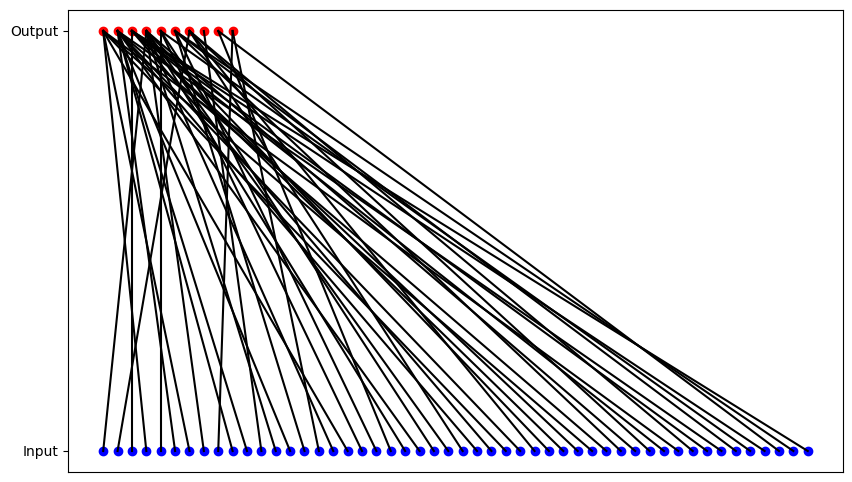

In [41]:
#| echo: false
# draw mapping diagram. The cardinality of the left set is 200, the cardinality of the right set is 100
import matplotlib.pyplot as plt
import numpy as np

# Set cardinalities
left_cardinality = 50
right_cardinality = 10

# Generate positions for set members
left_positions = [(i, 1) for i in range(left_cardinality)]
right_positions = [(i, 2) for i in range(right_cardinality)]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot set members as points
for position in left_positions:
    ax.plot(position[0], position[1], 'bo')  # blue circles for left set

for position in right_positions:
    ax.plot(position[0], position[1], 'ro')  # red circles for right set

# Example mapping: connecting each element in left to an element in right
for left in left_positions:
    # This example connects each element in left set to a random element in right set
    right = right_positions[np.random.randint(right_cardinality)]
    ax.plot([left[0], right[0]], [left[1], right[1]], 'k-')  # black lines for mappings

ax.set_yticks([1, 2])
ax.set_yticklabels(['Input', 'Output'])

# Remove x ticks and display the plot
ax.set_xticks([])
plt.show()


The simplest way is just take the modulo of the number with the size of the array.

In [25]:
def simple_hash(number):
    return number % 10

print(simple_hash(1))
print(simple_hash(3))
print(simple_hash(12))
print(simple_hash(15))

1
3
2
5


In [29]:
random_numbers = [random.randint(1, 1_000_000) for i in range(10)]
for i in random_numbers:
    print("{} -> {}".format(i, simple_hash(i)))

510897 -> 7
199229 -> 9
973920 -> 0
955545 -> 5
604921 -> 1
409797 -> 7
766530 -> 0
385722 -> 2
232178 -> 8
787135 -> 5


See, we can now map any number into a smaller number. In this case to 10 numbers.

### String Hash

What if we want to hash a string?

The idea is the same. 

First, we need to convert the string into a number. We can do it by converting each character into its ASCII code and then sum them up.

Then we can use the same module function as above.

In [1]:
def string_hash(string):
    # this is simple hash example
    return sum([ord(c) for c in string]) % 100

print(string_hash("hello"))
print(string_hash("ehllo"))
print(string_hash("world"))
print(string_hash("how are you?"))

32
32
52
22


One of the proper string hashing algorithm is as follows, it involves math, but the idea is the same.

In [3]:
def djb2(input_string):
    hash = 5381
    for char in input_string:
        hash = ((hash << 5) + hash) + ord(char)  # hash * 33 + char
    return hash & 0xFFFFFFFF_FFFFFFFF  # return a 32-bit number

# Test
s = "hello"
print(djb2(s))
print(djb2("ehllo"))

210714636441
210711186489


## Collisions

Since we are mapping a large set of numbers into a smaller set of numbers, there might be collisions.

In [36]:
print(simple_hash(1))
print(simple_hash(11))
print(simple_hash(21))

1
1
1


In our example, 1, 11, 21 are mapped to the same number. This is expected

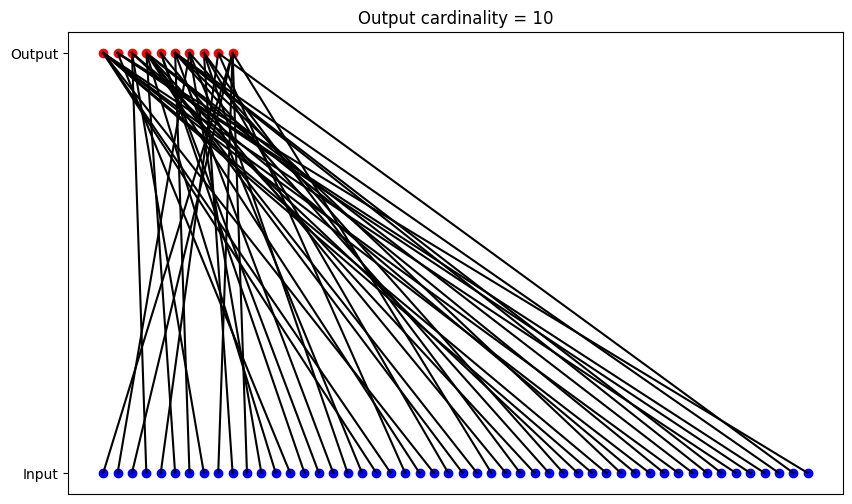

In [45]:
#| echo: false
# draw mapping diagram. The cardinality of the left set is 200, the cardinality of the right set is 100
import matplotlib.pyplot as plt
import numpy as np

# Set cardinalities
left_cardinality = 50
right_cardinality = 10

# Generate positions for set members
left_positions = [(i, 1) for i in range(left_cardinality)]
right_positions = [(i, 2) for i in range(right_cardinality)]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot set members as points
for position in left_positions:
    ax.plot(position[0], position[1], 'bo')  # blue circles for left set

for position in right_positions:
    ax.plot(position[0], position[1], 'ro')  # red circles for right set

# Example mapping: connecting each element in left to an element in right
for left in left_positions:
    # This example connects each element in left set to a random element in right set
    right = right_positions[np.random.randint(right_cardinality)]
    ax.plot([left[0], right[0]], [left[1], right[1]], 'k-')  # black lines for mappings

ax.set_yticks([1, 2])
ax.set_yticklabels(['Input', 'Output'])

# Remove x ticks and display the plot
ax.set_xticks([])
plt.title("Output cardinality = 10")
plt.show()


To minimize collisions, one way is to use larger array

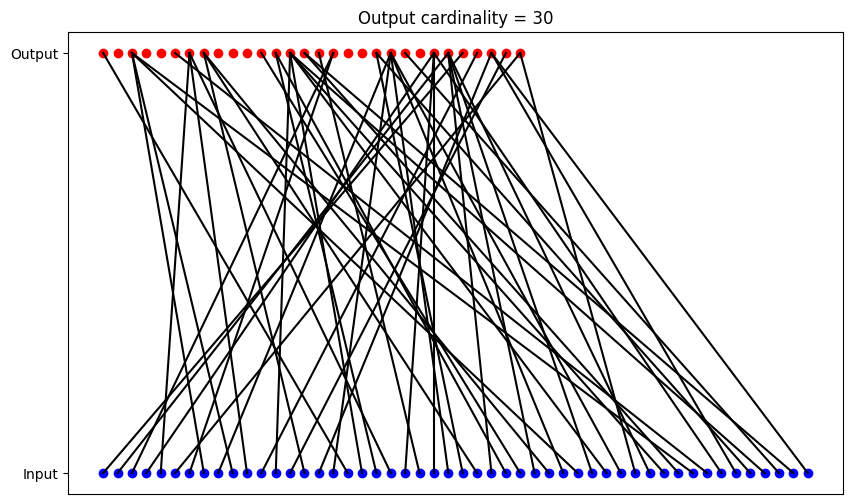

In [46]:
#| echo: false
# draw mapping diagram. The cardinality of the left set is 200, the cardinality of the right set is 100
import matplotlib.pyplot as plt
import numpy as np

# Set cardinalities
left_cardinality = 50
right_cardinality = 30

# Generate positions for set members
left_positions = [(i, 1) for i in range(left_cardinality)]
right_positions = [(i, 2) for i in range(right_cardinality)]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot set members as points
for position in left_positions:
    ax.plot(position[0], position[1], 'bo')  # blue circles for left set

for position in right_positions:
    ax.plot(position[0], position[1], 'ro')  # red circles for right set

# Example mapping: connecting each element in left to an element in right
for left in left_positions:
    # This example connects each element in left set to a random element in right set
    right = right_positions[np.random.randint(right_cardinality)]
    ax.plot([left[0], right[0]], [left[1], right[1]], 'k-')  # black lines for mappings

ax.set_yticks([1, 2])
ax.set_yticklabels(['Input', 'Output'])

# Remove x ticks and display the plot
ax.set_xticks([])
plt.title("Output cardinality = 30")
plt.show()


The choice of hash function also affects the number of collisions. There are better hash functions than just our simple modulo function.

Neverthless, collisions are inevitable. We will handle collisions later, but for now let's create our own set.

## Space Efficient Set

In [8]:
import random
numbers = [random.randint(1, 1_000_000) for i in range(200)]

Let's modify the previous method a little bit, now we calculate the hash of the value and use it as the index of the array.

In [51]:
def simple_hash(number, hash_size):
    return number % hash_size
    
def unique_elements(arr):
    hash_size = 100

    bool_arr = [False] * hash_size
    for item in arr:
        # hash the number
        hashed_value = simple_hash(item, hash_size)
        bool_arr[hashed_value] = True
    
    print(bool_arr[:100])
    
    unique = []
    for i in range(len(bool_arr)):
        if bool_arr[i]:
            unique.append(i)
    return unique

print(len(unique_elements(numbers)))


[True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True]
88


Wow, we have now create memory efficient set!

Haven't we?

It turns out the above method is not correct. We don't have the information of the value anymore!

Let's fix that. Rather than storing boolean, let's store the value itself.

In [58]:
def simple_hash(number, hash_size):
    return number % hash_size
    
def unique_elements(arr):
    hash_size = 100

    table = [None] * hash_size
    for item in arr:
        # hash the number
        hashed_value = simple_hash(item, hash_size)
        # we store the item in the table
        table[hashed_value] = item
    
    print(table[:100])
    
    unique = []
    for i in range(len(table)):
        # check None
        if table[i] is not None:
            unique.append(i)
    return unique

print(len(unique_elements(numbers)))


[None, 557501, 107802, 946203, 358904, None, 41106, None, 415708, 930809, 302010, 858111, None, 507113, None, 111015, None, 42017, 334918, 600719, 711720, 193821, 736522, 665623, None, 344125, 919726, 304327, None, 237029, 987230, None, 168532, 168633, 585934, 505935, 95736, 406137, 575138, 427839, 560640, 187541, 36342, 11643, 902744, 213545, 914346, 654647, 588848, 320549, None, 391251, 371252, None, 380354, 715355, 957056, 19857, 702558, None, 453260, 139361, 765762, 875463, 486464, 414765, None, 691267, None, 962069, 93070, 568271, 210372, 885273, None, 102575, 771776, None, 657778, 231079, None, 379281, 809982, 566783, 630784, 161985, 455886, 218287, 155488, 483589, 505690, 72291, 191492, 999793, 945294, 403095, 121096, 185297, 976398, 135599]
83


## Collision Handling

We now have the value of the element, but what if there is a collision?

In [59]:
unique_elements([2, 1])

[None, 1, 2, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


[1, 2]

In [60]:
unique_elements([101, 1])

[None, 1, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


[1]

There are two ways to handle collision: chaining and open addressing. We will discuss chaining here and let you explore open addressing yourself.

### Chaining

The idea is simple: instead of storing the item in the table, we store a list of items. When we want to insert an item, we hash it and then append it to the list at the hashed index.

In [9]:
def simple_hash(number, hash_size):
    return number % hash_size
    
def unique_elements(arr):
    hash_size = 100

    table = [None] * hash_size
    for item in arr:
        hashed_value = simple_hash(item, hash_size)

        if table[hashed_value] is None:
            table[hashed_value] = []

        already_exist = False
        for element in table[hashed_value]:
            if element == item:
                already_exist = True

        # make sure we don't add duplicates
        if not already_exist:
            table[hashed_value].append(item)
    
    print(table[:100])
    
    unique = []
    for i in range(len(table)):
        if table[i] is not None:
            for element in table[i]:
                unique.append(element)
    return unique

print(len(unique_elements(numbers)))


[[823900], None, None, [449603], [302304, 958104], None, [381006, 269706, 755506, 503406, 420406], None, [619408, 591708, 913308, 510908], [961309], [683210, 705410, 418910], [522311, 454311], None, [649413], [476414, 275214, 274314, 432114, 366314], [584715, 863615, 598615, 895015], [764516, 648116, 115516, 273716, 66416, 604316, 944216], None, [974718, 416918], [661919], [107920, 799520, 789120], [599121, 355521, 498021, 877921], [343322, 664622], None, [717924], [852025, 668025], [707726, 881326, 607326, 844726], [11927, 457027, 783927], [675428], [861129], None, None, None, None, [742934, 23934], [433335], [928836, 493536, 688036, 776236], [719037, 49737], None, [320639], None, [398441, 686141, 453541, 869941, 85241], [208042, 698642, 948442, 839442], [894243, 879143, 385843], None, [698445, 354445, 554645, 794845, 823945], [259646, 938646, 18246], [143547, 458747, 234547, 347947], [587248], [941149], [131950, 575650], [921451], [122752], None, [276054], [354855, 281655], [538456, 

Done, we have now created a set!

`unique_elements(array)` is equal to `set(array)` method

## Rehashing

When the load factor is too high, we need to rehash the table. Otherwise, the performance will degrade.

In [6]:
print(len(unique_elements([1, 101, 201, 301, 401, 501, 601])))

[None, [1, 101, 201, 301, 401, 501, 601], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
7


Since there are many items in the same index, the algorithm will become `O(n)`!

The solution is to create a new table with larger size and rehash all the items.

## High Level Library

In Python, we can use `set` to create a set.

To add an item, we can use `add` method.

To check if an item is in the set, we can use `in` operator.

In [75]:
s = set([1, 101, 201, 301, 401, 501, 501]) # 501 is duplicated
print(s)
s.add(2)
print(s)
# this is not added due to duplication
s.add(2)
print(s)

print(101 in s) # True
print(102 in s) # True


{1, 101, 201, 301, 401, 501}
{1, 2, 101, 201, 301, 401, 501}
{1, 2, 101, 201, 301, 401, 501}
True
False


## Set Operations

Set has many operations, such as union, intersection, difference

In [86]:
# union
s1 = set([1, 2, 3])
s2 = set([2, 3, 4])
print(s1.union(s2))

# intersection
print(s1.intersection(s2))

# difference
print(s1.difference(s2))
print(s2.difference(s1))

{1, 2, 3, 4}
{2, 3}
{1}
{4}


## Complexity

| Operation | Complexity |
| --- | --- |
| Add | O(1) |
| Remove | O(1) |
| Contains | O(1) |


## Use Cases

### Finding Unique Elements in an Array

- Input: array of numbers
- Output: array of unique numbers

In [76]:
arr = [2, 3, 2, 4, 5, 10, 3, 5, 6, 2, 8]
# how many unique elements in arr?
print(len(set(arr)))
# done!

7


In [77]:
registrants = ["Alice", "Bob", "Charlie", "Alice", "Bob", "Alice"]
# how many unique registrants?
print(len(set(registrants)))

3


### Membership Checking

Let's say we have a list of banned users. We want to check if a user is banned or not.

In [80]:
banned_users = ["Eve", "Mallory", "Trent", "Alice", "Bob", "Charlie", "Gorilla"]

def is_banned(name):
    # O(n)
    for banned in banned_users:
        if name == banned:
            return True
    return False

print(is_banned("Eve"))
print(is_banned("Lily"))

True
False


The above code runs in `O(n)` time. If we use set, it will run in `O(1)` time (and the code is much simpler)

In [81]:
banned_users = {"Eve", "Mallory", "Trent", "Alice", "Bob", "Charlie", "Gorilla"}

def is_banned(name):
    # O(1)
    return name in banned_users

print(is_banned("Eve"))
print(is_banned("Lily"))

True
False


In [83]:
registrants = set()

def register(name):
    # O(1)
    if name in registrants:
        raise Exception("Name already registered")
    # O(1)
    registrants.add(name)

register("Alice")
register("Bob")
register("Charlie")
register("Alice")  # raises exception


Exception: Name already registered